LANGKAH 1 — Pemahaman & Pengambilan Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [20]:
df = pd.read_csv(r"D:\Analitik_Data\projek_uas\shopping_trends_updated.csv")
print("Dataset Loaded!")
df.head()

Dataset Loaded!


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [22]:
df["Gender_Male"] = df["Gender"].map({"Female": 0, "Male": 1})
df[["Gender", "Gender_Male"]].head()
df["Gender"].value_counts()



Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [23]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

print("\nTipe Data:")
print(df.dtypes)

print("\nStatistik Deskriptif:")
df.describe(include="all").T

Jumlah baris: 3900
Jumlah kolom: 19

Tipe Data:
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
Gender_Male                 int64
dtype: object

Statistik Deskriptif:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,NaN,NaN,NaN,1950.5,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,NaN,NaN,NaN,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Gender,3900,2,Male,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,3900,25,Blouse,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,3900,4,Clothing,1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Amount (USD),3900.0,NaN,NaN,NaN,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Location,3900,50,Montana,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,3900,4,M,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,3900,25,Olive,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,3900,4,Spring,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

LANGKAH 2 — Eksplorasi Data (EDA)

In [ ]:
# Missing Value
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

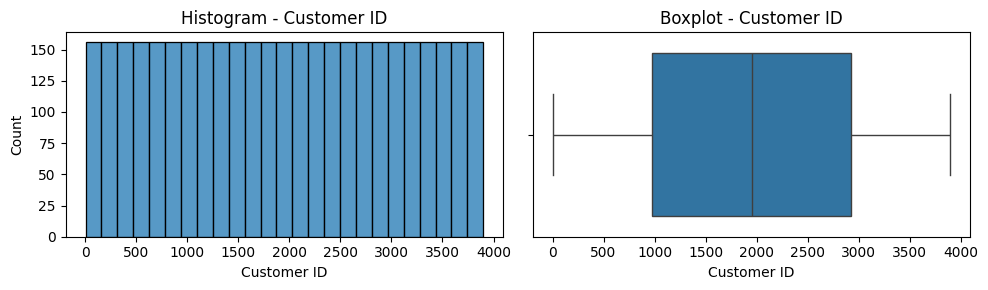

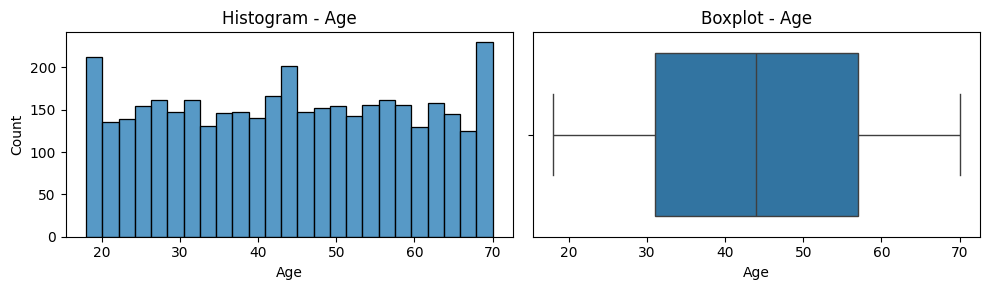

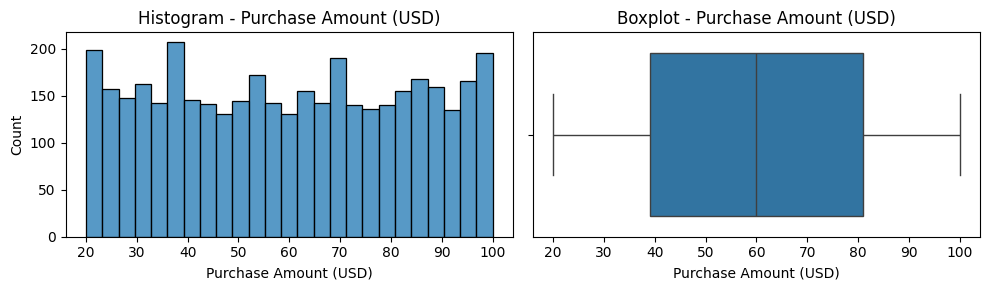

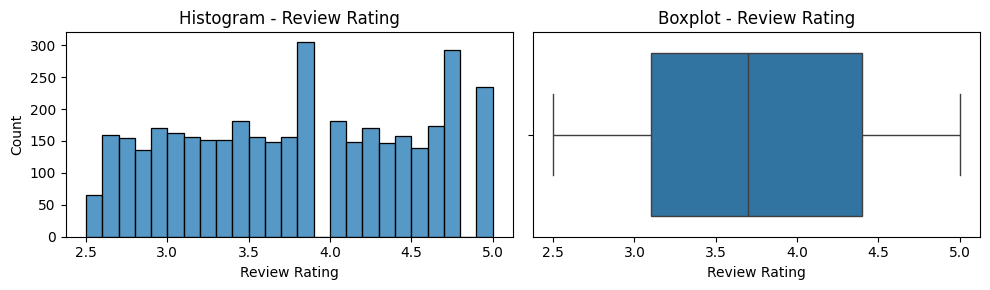

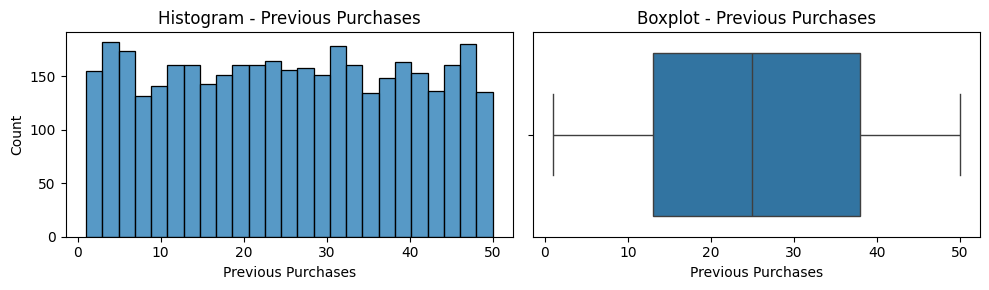

In [5]:
# Histogram & Boxplot
for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.histplot(df[col], bins=25, ax=ax[0])
    ax[0].set_title(f"Histogram - {col}")

    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f"Boxplot - {col}")

    plt.tight_layout()
    plt.show()

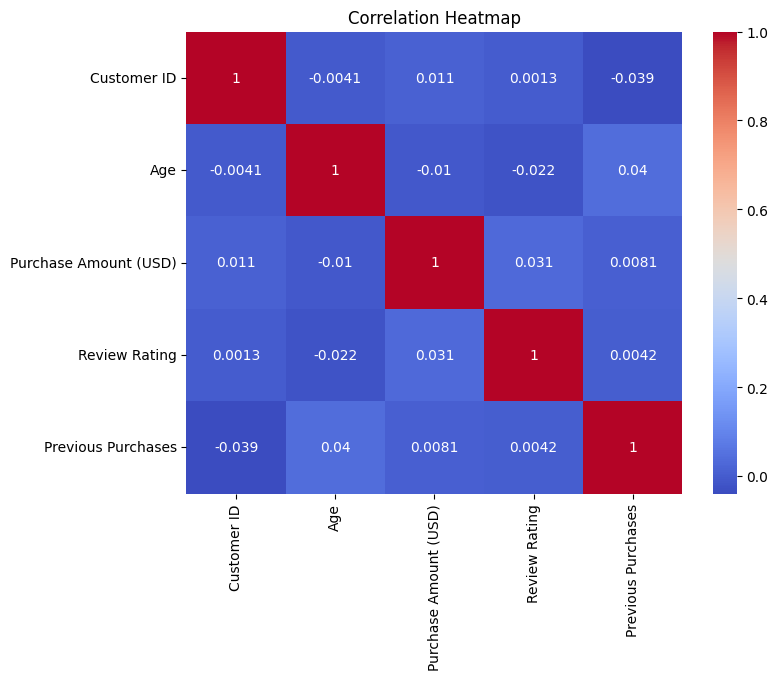

In [6]:
# Heatmap Korelasi

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [18]:
# Fitur Paling Berpengaruh (Heuristik)

df[numeric_cols].var().sort_values(ascending=False).head()

Customer ID              1.267825e+06
Purchase Amount (USD)    5.609978e+02
Age                      2.312708e+02
Previous Purchases       2.087194e+02
Review Rating            5.129751e-01
dtype: float64

LANGKAH 3 — Pra-Pemrosesan Data

In [8]:
# Missing Value
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [9]:
# Encoding Kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [10]:
#  Hapus Duplikasi
df = df.drop_duplicates()

In [25]:
df_cluster = df[[
    "Age",
    "Purchase Amount (USD)",
    "Review Rating",
    "Previous Purchases",
    "Gender_Male"
]]

df_cluster.head()


,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male
0,55,53,3.1,14,1
1,19,64,3.1,2,1
2,50,73,3.1,23,1
3,21,90,3.5,49,1
4,45,49,2.7,31,1


In [26]:
# Normalisasi
sscaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

print("Normalisasi selesai!")



Normalisasi selesai!


In [33]:
df_normalized = pd.DataFrame(X_scaled, columns=df_cluster.columns)

df_normalized.to_csv("data_normalized.csv", index=False)
print("File saved: data_normalized.csv")


File saved: data_normalized.csv


LANGKAH 4 — Menentukan Jumlah Cluster Optimal

c:\Users\benny\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\benny\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


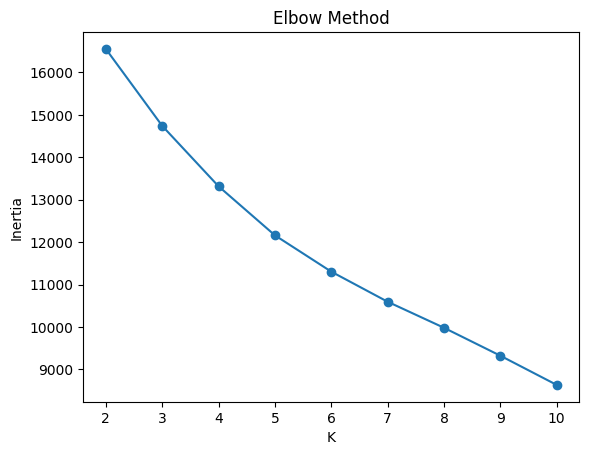

In [12]:
# Elbow Method

inertia_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia_scores.append(km.inertia_)

plt.plot(K_range, inertia_scores, marker="o")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


,K,Silhouette Score
0,2,0.150100
1,3,0.186631
2,4,0.166441
3,5,0.178106
4,6,0.187283
5,7,0.185019
6,8,0.179384
7,9,0.177821
8,10,0.186257


Silhouette Score terbaik ada pada K = 6
Nilai Silhouette Score tertinggi = 0.1873


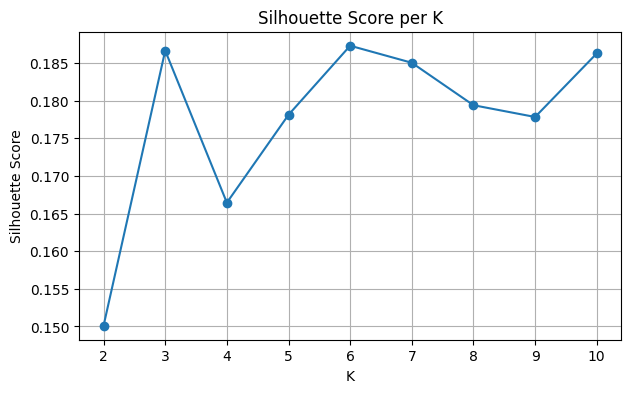

In [ ]:
# Silhouette Score

K_range = range(2, 11)
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

# === Membuat tabel hasil silhouette ===
silhouette_table = pd.DataFrame({
    "K": list(K_range),
    "Silhouette Score": sil_scores
})

display(silhouette_table)

# === Mencetak nilai terbaik ===
best_k = silhouette_table.loc[silhouette_table["Silhouette Score"].idxmax(), "K"]
best_score = max(sil_scores)

print(f"Silhouette Score terbaik ada pada K = {best_k}")
print(f"Nilai Silhouette Score tertinggi = {best_score:.4f}")

# === Visualisasi Silhouette Score ===
plt.figure(figsize=(7,4))
plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score per K")
plt.grid(True)
plt.show()


LANGKAH 5 — Penerapan K-Means Final

In [14]:
k_final = 4
kmeans = KMeans(n_clusters=k_final, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


LANGKAH 6 — Visualisasi & Analisis Hasil

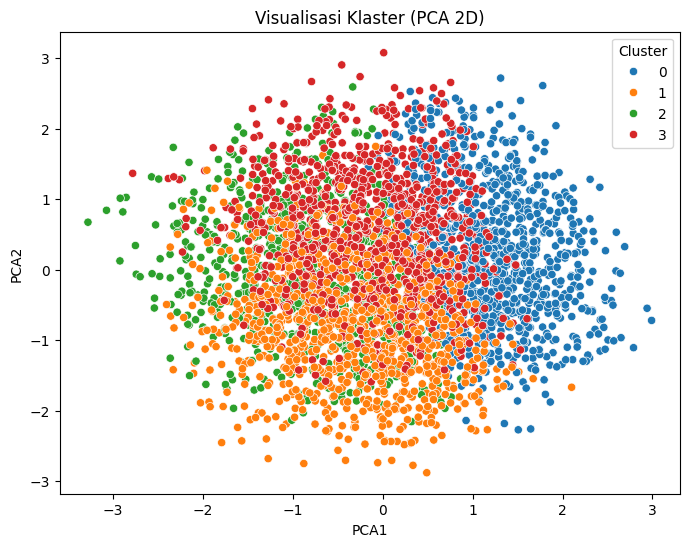

In [15]:
# PCA 2D
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X_scaled)

df["PCA1"] = pca_res[:, 0]
df["PCA2"] = pca_res[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="tab10")
plt.title("Visualisasi Klaster (PCA 2D)")
plt.show()


In [16]:
# Karakteristik Klaster
df.groupby("Cluster").mean()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,PCA1,PCA2
Cluster,,,,,,,,,,,,,,,,,,,,,
0,955.165147,55.573455,57.412361,3.660486,33.130699,0.991895,0.035461,0.039514,0.044580,0.051672,...,0.169200,0.169200,0.131712,0.135765,0.139818,0.130699,0.161094,0.156028,1.200104,0.244353
1,2899.965803,52.747150,55.789637,3.566321,15.736788,0.333679,0.039378,0.046632,0.031088,0.033161,...,0.180311,0.165803,0.144041,0.144041,0.140933,0.145078,0.130570,0.129534,-0.355267,-0.784364
2,1394.685166,31.207871,60.473259,3.828557,14.197780,0.898083,0.050454,0.032291,0.034309,0.040363,...,0.163471,0.151362,0.151362,0.164480,0.144299,0.144299,0.125126,0.133199,-0.738798,-0.051087
3,2595.195402,36.769070,65.463950,3.945977,38.573668,0.481714,0.039707,0.057471,0.037618,0.039707,...,0.181818,0.164054,0.133751,0.154650,0.130617,0.147335,0.160920,0.133751,-0.114441,0.591809
